In [1]:
# Imports
import argparse
import glob
import os
import sys
import re

# Third party imports
import xarray as xr
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import cftime

In [2]:
# Import from dictionaries
import dictionaries as dic

# Import functions
import processing_NAO_data as pnd
import functions_lag as fnc

In [3]:
# Load the observations manually
obs = xr.open_dataset(dic.obs, chunks={"time": 50})

In [4]:
# Set up the forecast range and season
forecast_range = "2-9"
season = "DJFM"
variable = "psl"

# Set up the test model
test_model = [ "BCC-CSM2-MR" ]

In [5]:
# Call the function to load the lagged ensemble members
# %tb
base_directory = "/home/users/benhutch/alternate-lag-processed-data"
lagged_ensemble_members = fnc.load_data(base_directory, dic.models_no_can, variable, forecast_range, season)

Searching for files in  /home/users/benhutch/alternate-lag-processed-data/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-1.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-2.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-3.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.same-init.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-1.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-2.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-3.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.same-init.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_

In [6]:
# (lagged_ensemble_members["BCC-CSM2-MR"])

In [7]:
# Process the model data
extracted_model_data, model_time = fnc.process_data(lagged_ensemble_members, variable)

Dataset type: <class 'dict'>


In [8]:
# print((lagged_nao))

In [9]:
# # Extract the model data from the combined model data
# extracted_model_data = fnc.extract_model_data(test_model, combined_model_data)

In [10]:
# Process the observations
obs_nao_anom, obs_time = pnd.process_observations(obs)

(56, 1, 1)
(56,)


In [11]:
obs_nao_anom.values

array([[[ -8.7587    ]],

       [[ -7.9083276 ]],

       [[-11.084158  ]],

       [[ -8.444869  ]],

       [[ -6.5122848 ]],

       [[ -8.014043  ]],

       [[ -6.6922154 ]],

       [[ -5.618949  ]],

       [[ -5.83326   ]],

       [[ -3.5506048 ]],

       [[  1.3817161 ]],

       [[  2.8501186 ]],

       [[  4.6533775 ]],

       [[  1.9506329 ]],

       [[  0.1312881 ]],

       [[ -2.819994  ]],

       [[ -3.5703855 ]],

       [[ -4.0657473 ]],

       [[ -1.8340122 ]],

       [[  0.01685768]],

       [[  2.8195739 ]],

       [[  1.8203976 ]],

       [[  1.4776977 ]],

       [[  0.38716817]],

       [[ -1.5151513 ]],

       [[  0.67279464]],

       [[  4.199362  ]],

       [[  4.814958  ]],

       [[  6.8670473 ]],

       [[  8.79417   ]],

       [[  8.001605  ]],

       [[  8.205825  ]],

       [[  5.1804132 ]],

       [[  3.7117255 ]],

       [[  1.9169059 ]],

       [[  1.1526965 ]],

       [[  0.17836659]],

       [[  0.8702545 ]],

       [[  0

In [12]:
obs_time

array(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='datetime64[Y]')

model data shape ()
Extracting data for model: BCC-CSM2-MR
Extracting data for model: MPI-ESM1-2-HR
Extracting data for model: CMCC-CM2-SR5
Extracting data for model: HadGEM3-GC31-MM
Extracting data for model: EC-Earth3
Extracting data for model: MPI-ESM1-2-LR
Extracting data for model: FGOALS-f3-L
Extracting data for model: MIROC6
Extracting data for model: IPSL-CM6A-LR
Extracting data for model: CESM1-1-CAM5-CMIP5
Extracting data for model: NorCPM1
ensemble members array shape (6952, 51, 1, 1)
For the obs time: <class 'numpy.ndarray'>
For the model time: <class 'numpy.ndarray'>
obs time ['1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016']
model

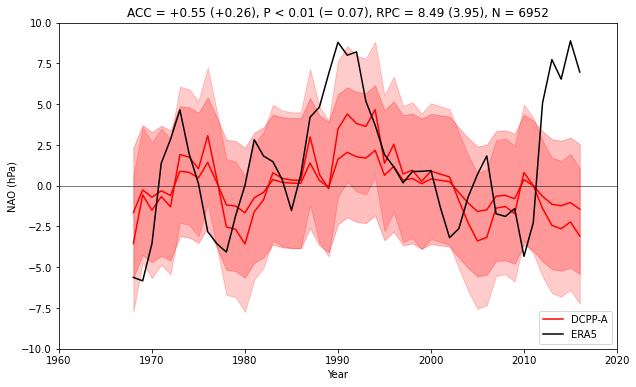

In [13]:
# Call the function to plot the data
pnd.plot_ensemble_members_and_lagged_adjusted_mean(dic.models_no_can, extracted_model_data, model_time, obs_nao_anom, obs_time, forecast_range, season)
